In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("District_wise_crimes_committed_against_women_2014.csv")

In [3]:
dataset.head()

,States/UTs,District,Year,Rape,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,Rape_Gang Rape,Rape_Others,...,"Commission of Sati Prevention Act, 1987","Protection of Women from Domestic Violence Act, 2005",Immoral Traffic Prevention Act,ITP Under Section 5,ITP Under Section 6,ITP Under Section 7,ITP Under Section 8,ITP Under Other Sections,Other SLL Crimes against Women,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,35,0,0,0,35,0,35,...,0,0,0,0,0,0,0,0,0,1097
1,Andhra Pradesh,Chittoor,2014,32,0,0,0,32,1,31,...,0,0,4,4,0,0,0,0,0,607
2,Andhra Pradesh,Cuddapah,2014,28,0,0,0,28,0,28,...,0,0,5,0,0,0,0,5,0,609
3,Andhra Pradesh,East Godavari,2014,85,0,0,0,85,0,85,...,0,0,16,0,0,0,0,16,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


# EDA

In [4]:
dataset.isnull().sum()

States/UTs                        0
District                          0
Year                              0
Rape                              0
Custodial Rape                    0
                                 ..
ITP Under Section 7               0
ITP Under Section 8               0
ITP Under Other Sections          0
Other SLL Crimes against Women    0
Total Crimes against Women        0
Length: 62, dtype: int64

In [5]:
list_of_types=list(dataset)

In [6]:
import re 
r = re.compile(".*Rape.*")
Rape_Crime=list(filter(r.match, list_of_types))

In [7]:
data_with_rape_cases=dataset[["States/UTs","District","Year"]].join(dataset[Rape_Crime])

In [8]:
data_with_rape_cases["Year"].unique()

array([2014], dtype=int64)

In [9]:
data_with_rape_cases.drop(columns=["Year"],inplace=True)

In [10]:
data_statewise=data_with_rape_cases.groupby(["States/UTs"],as_index=False).sum()

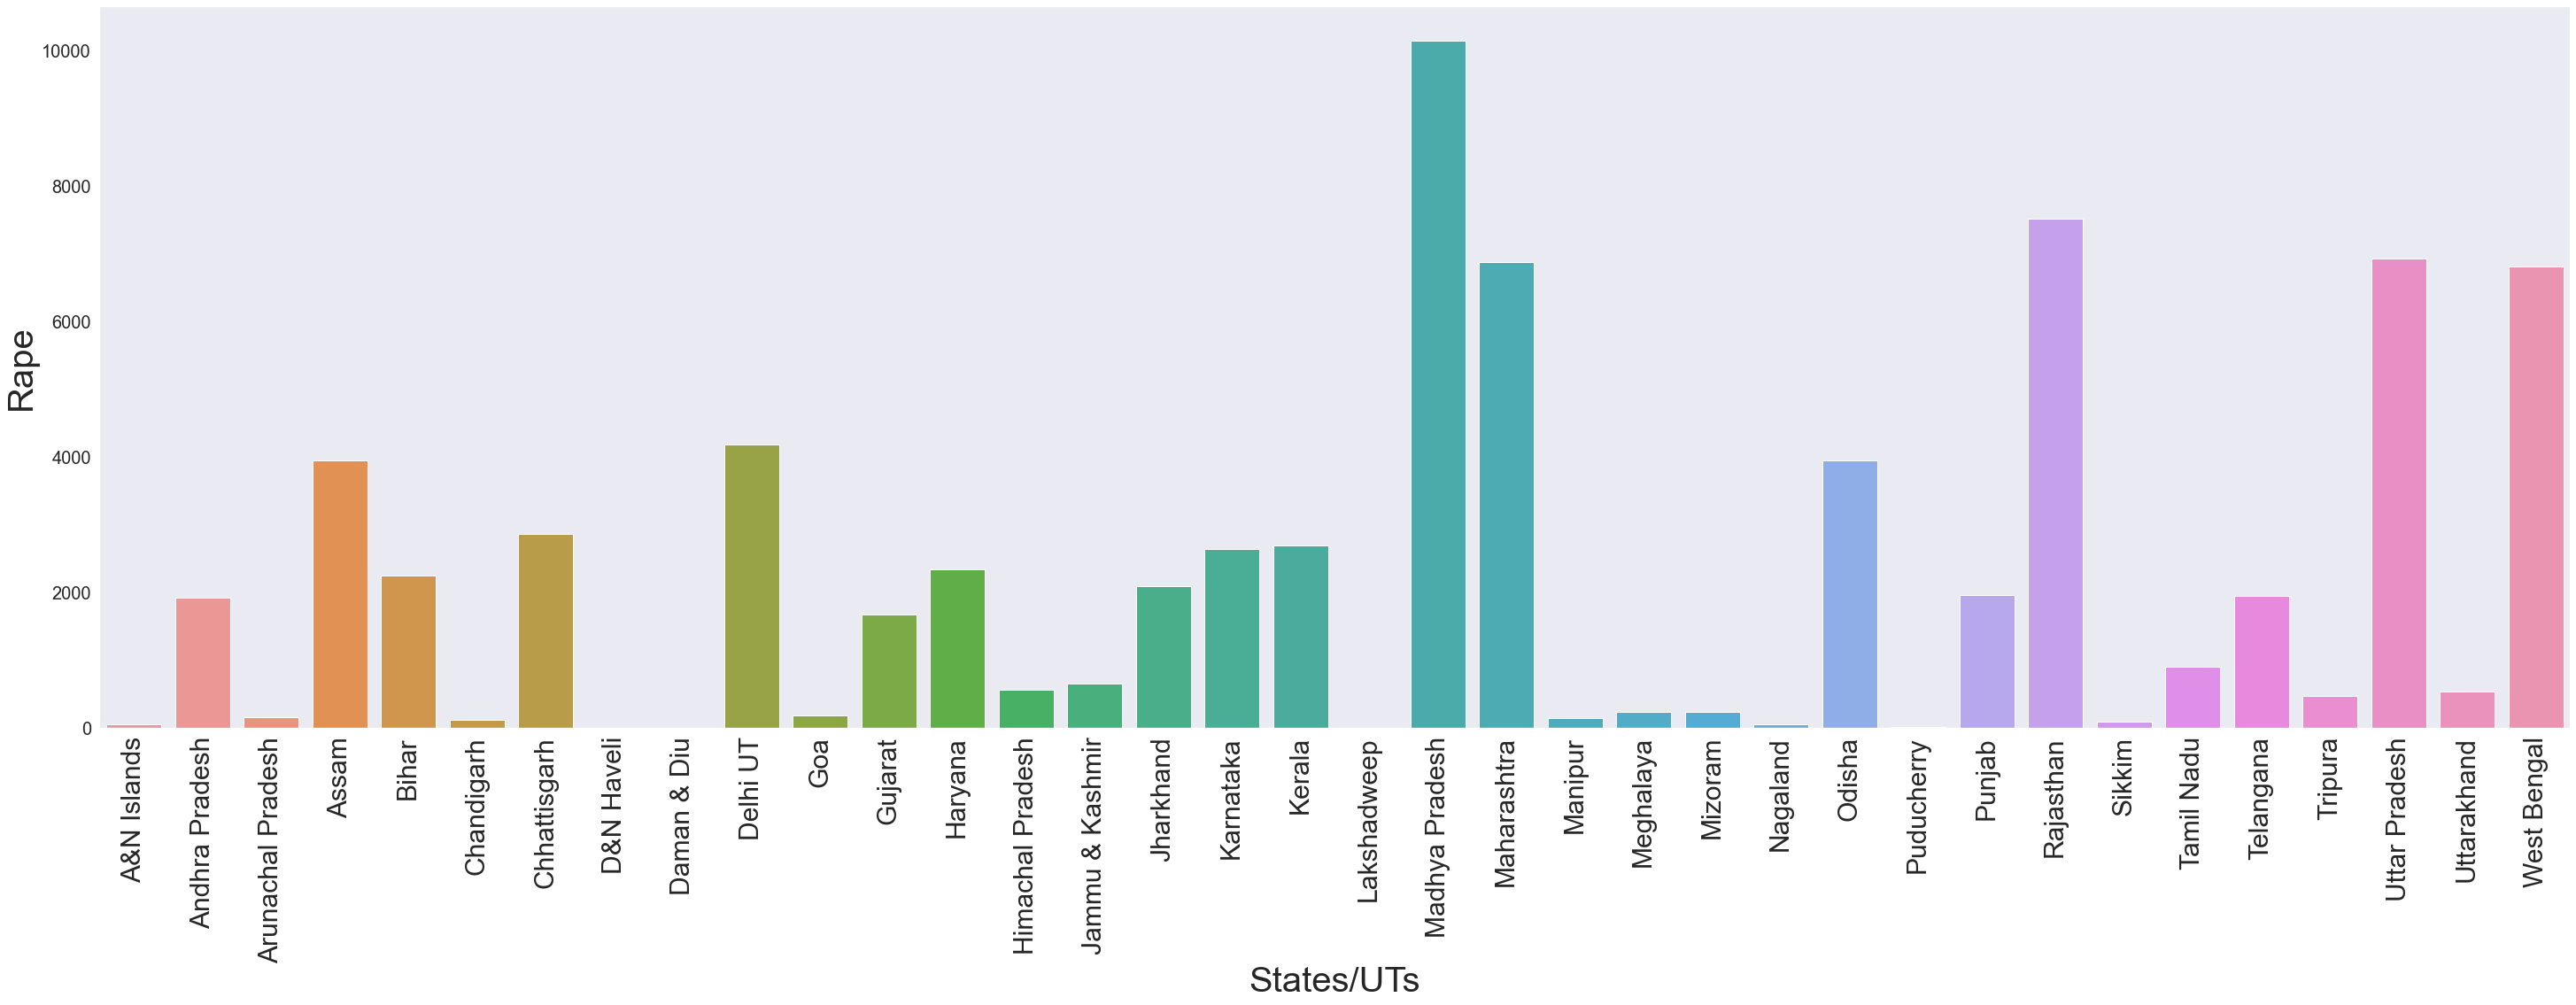

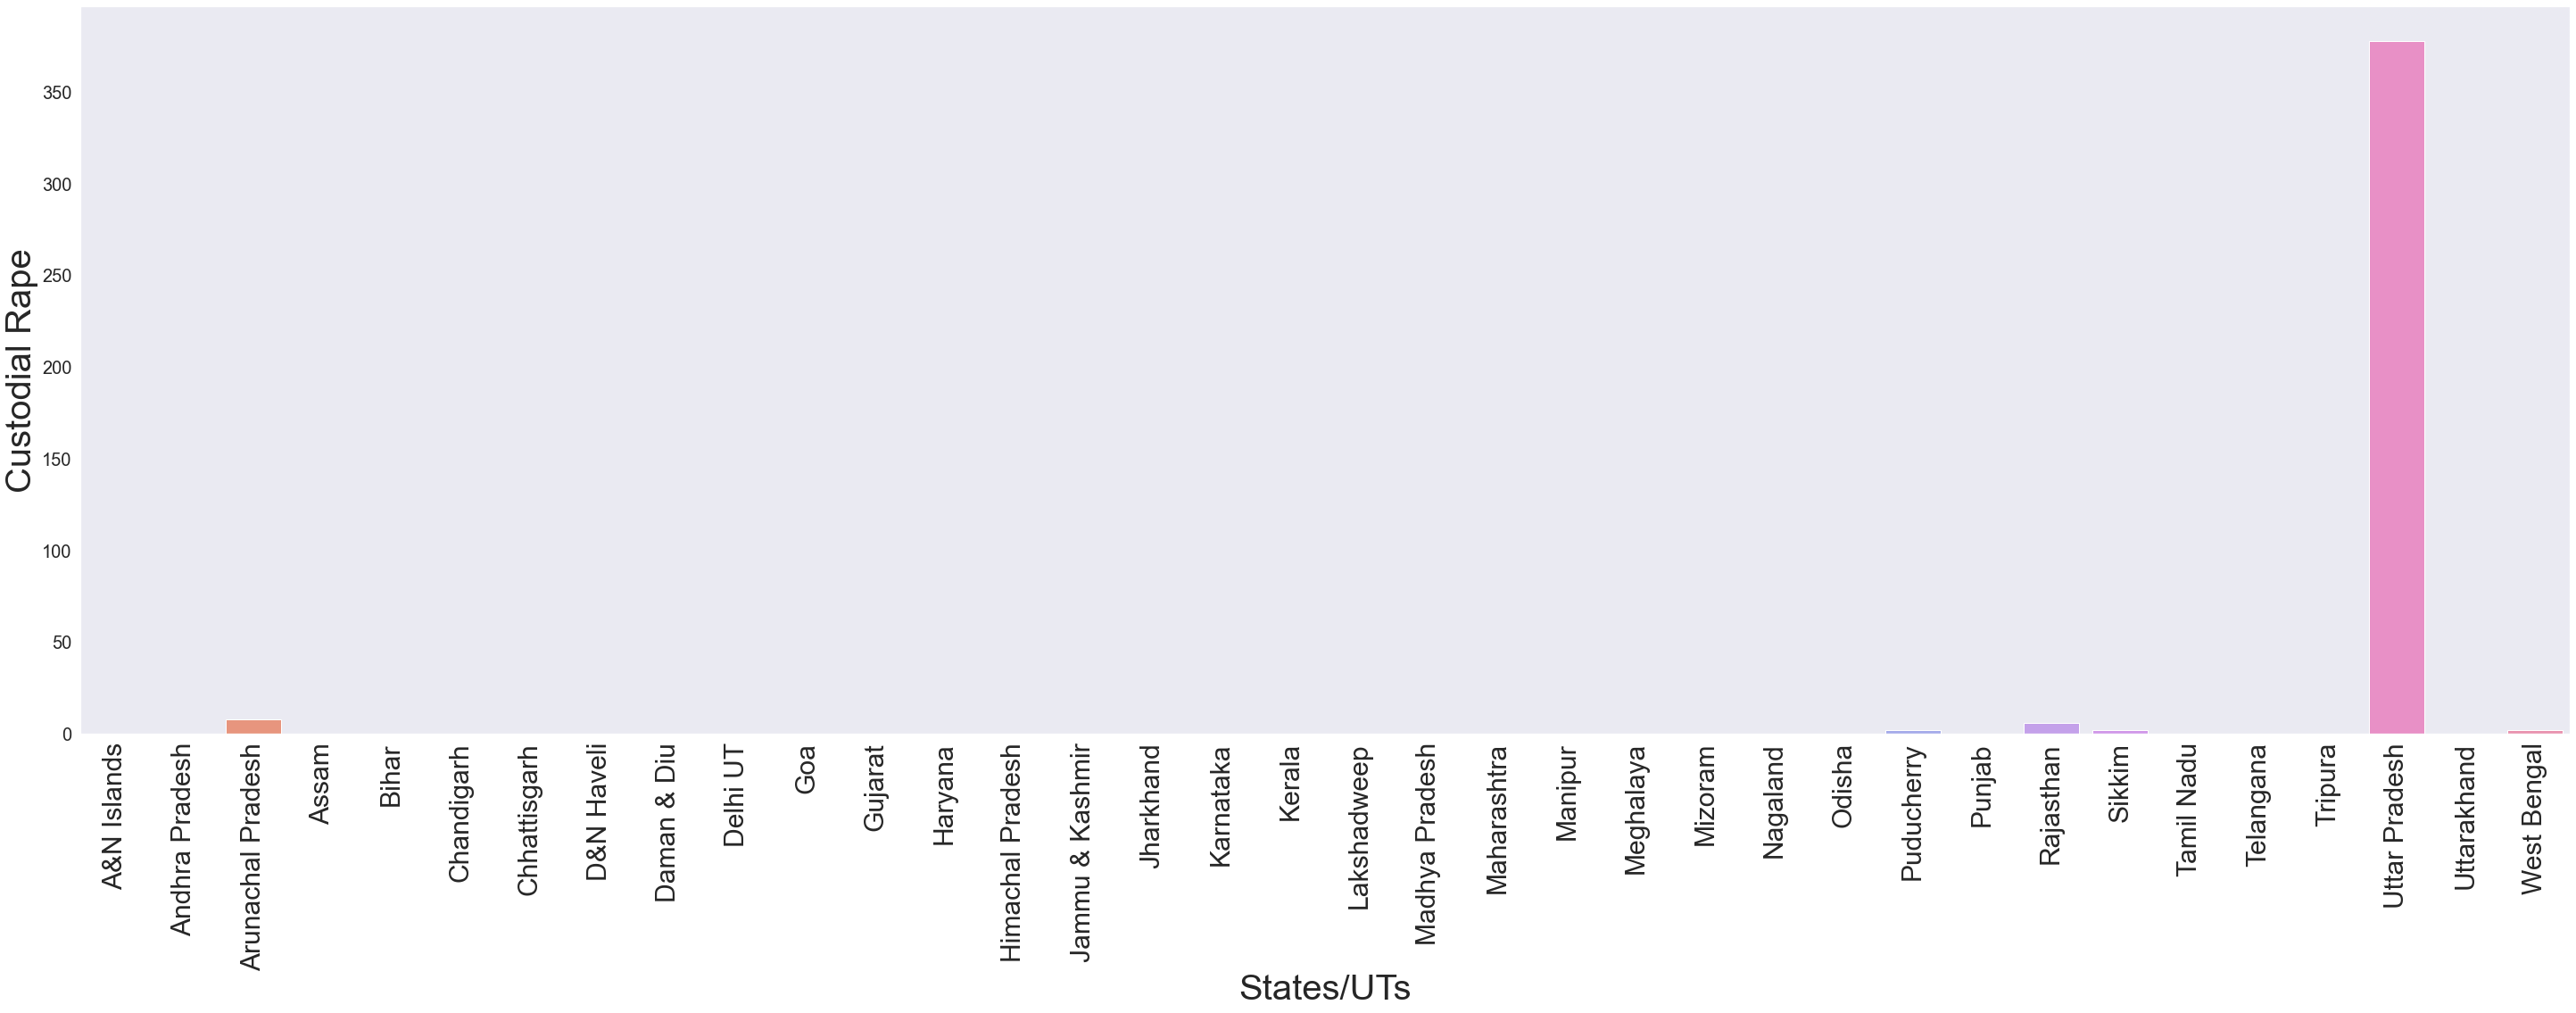

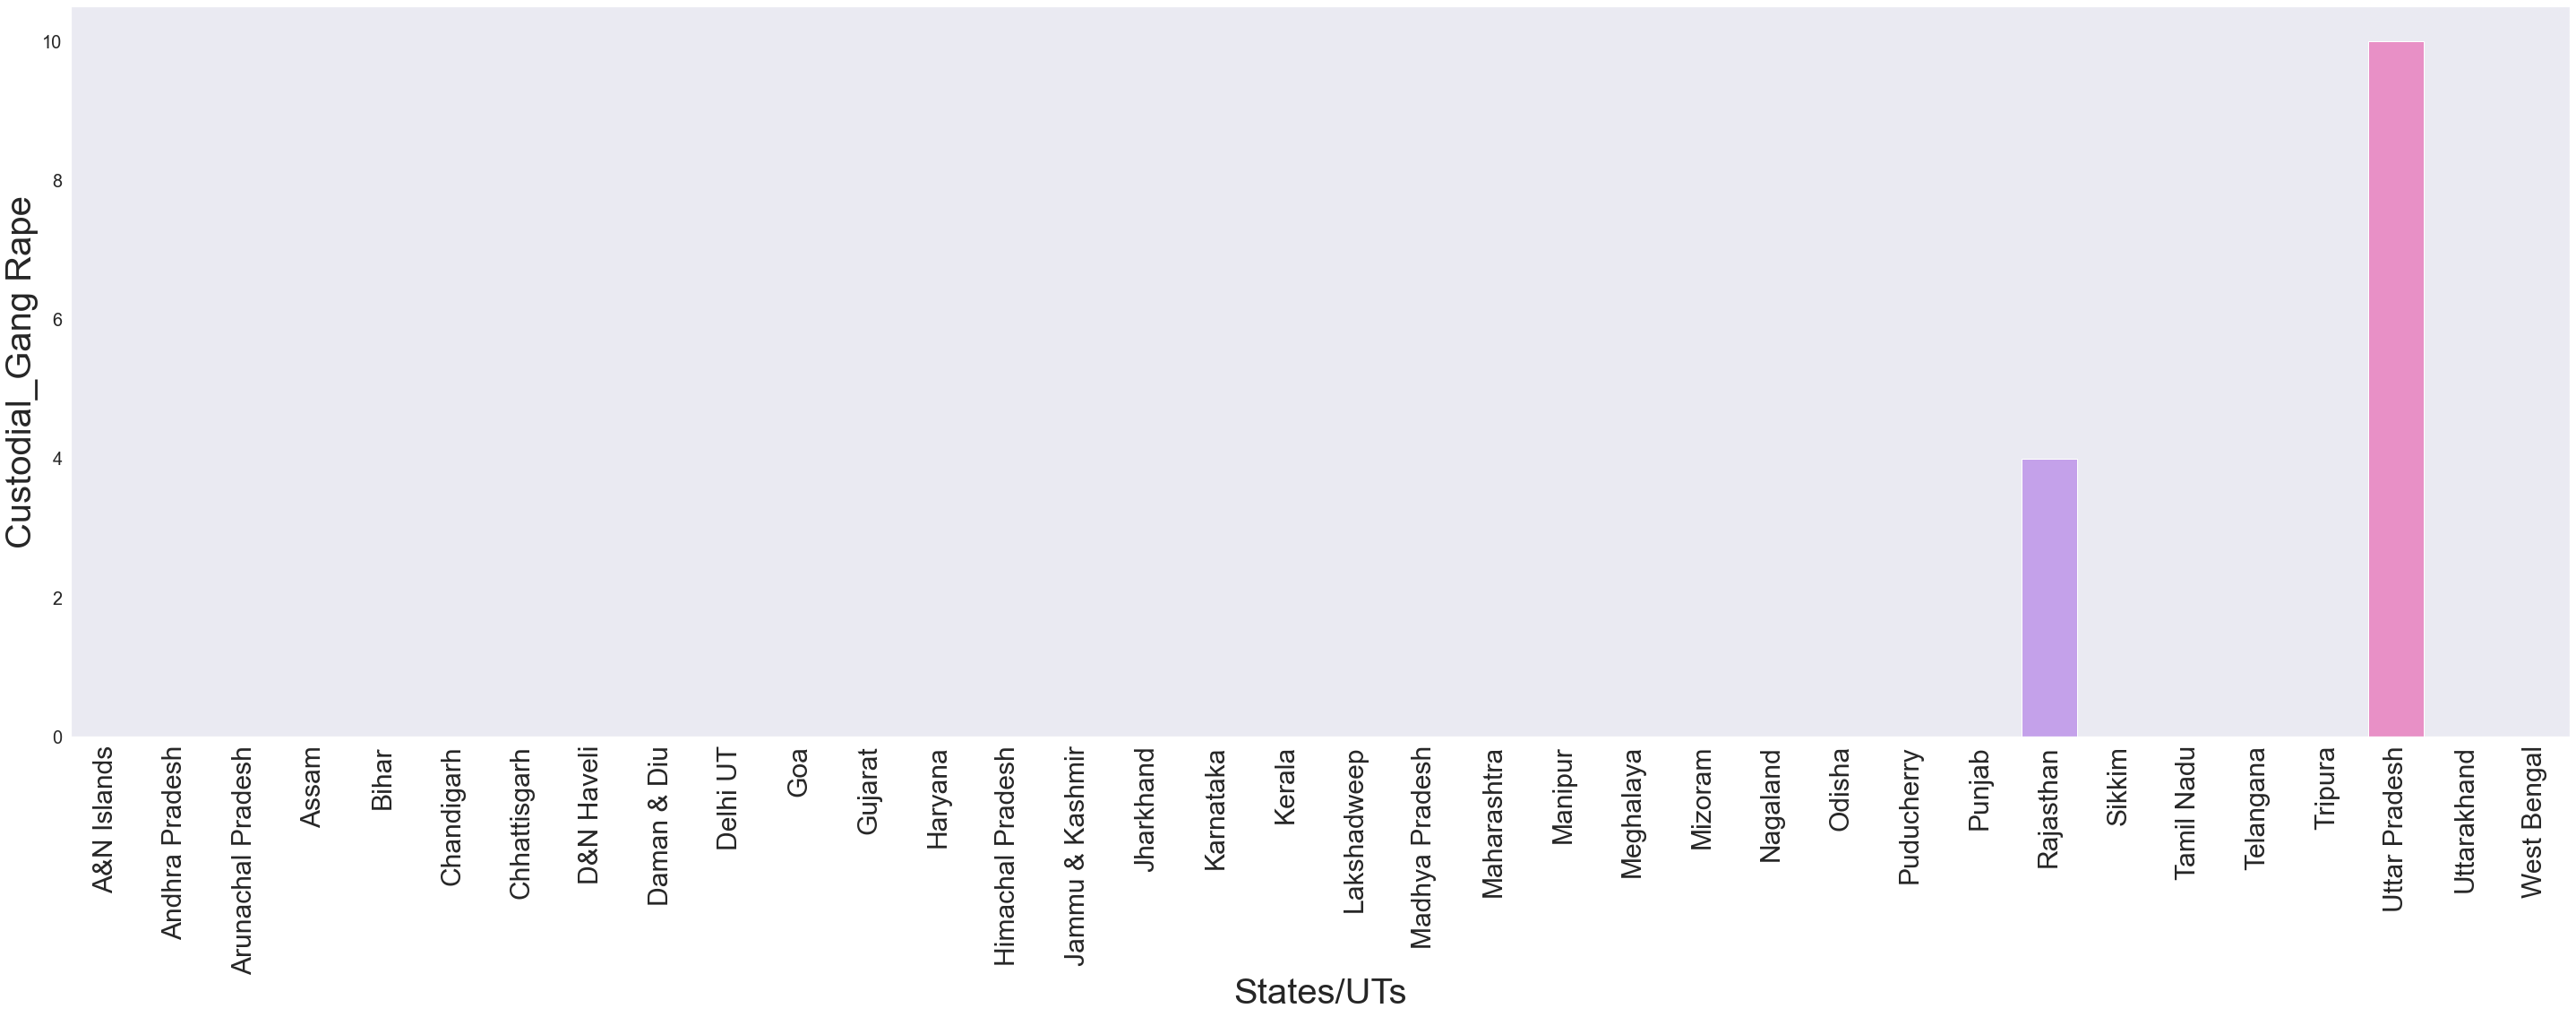

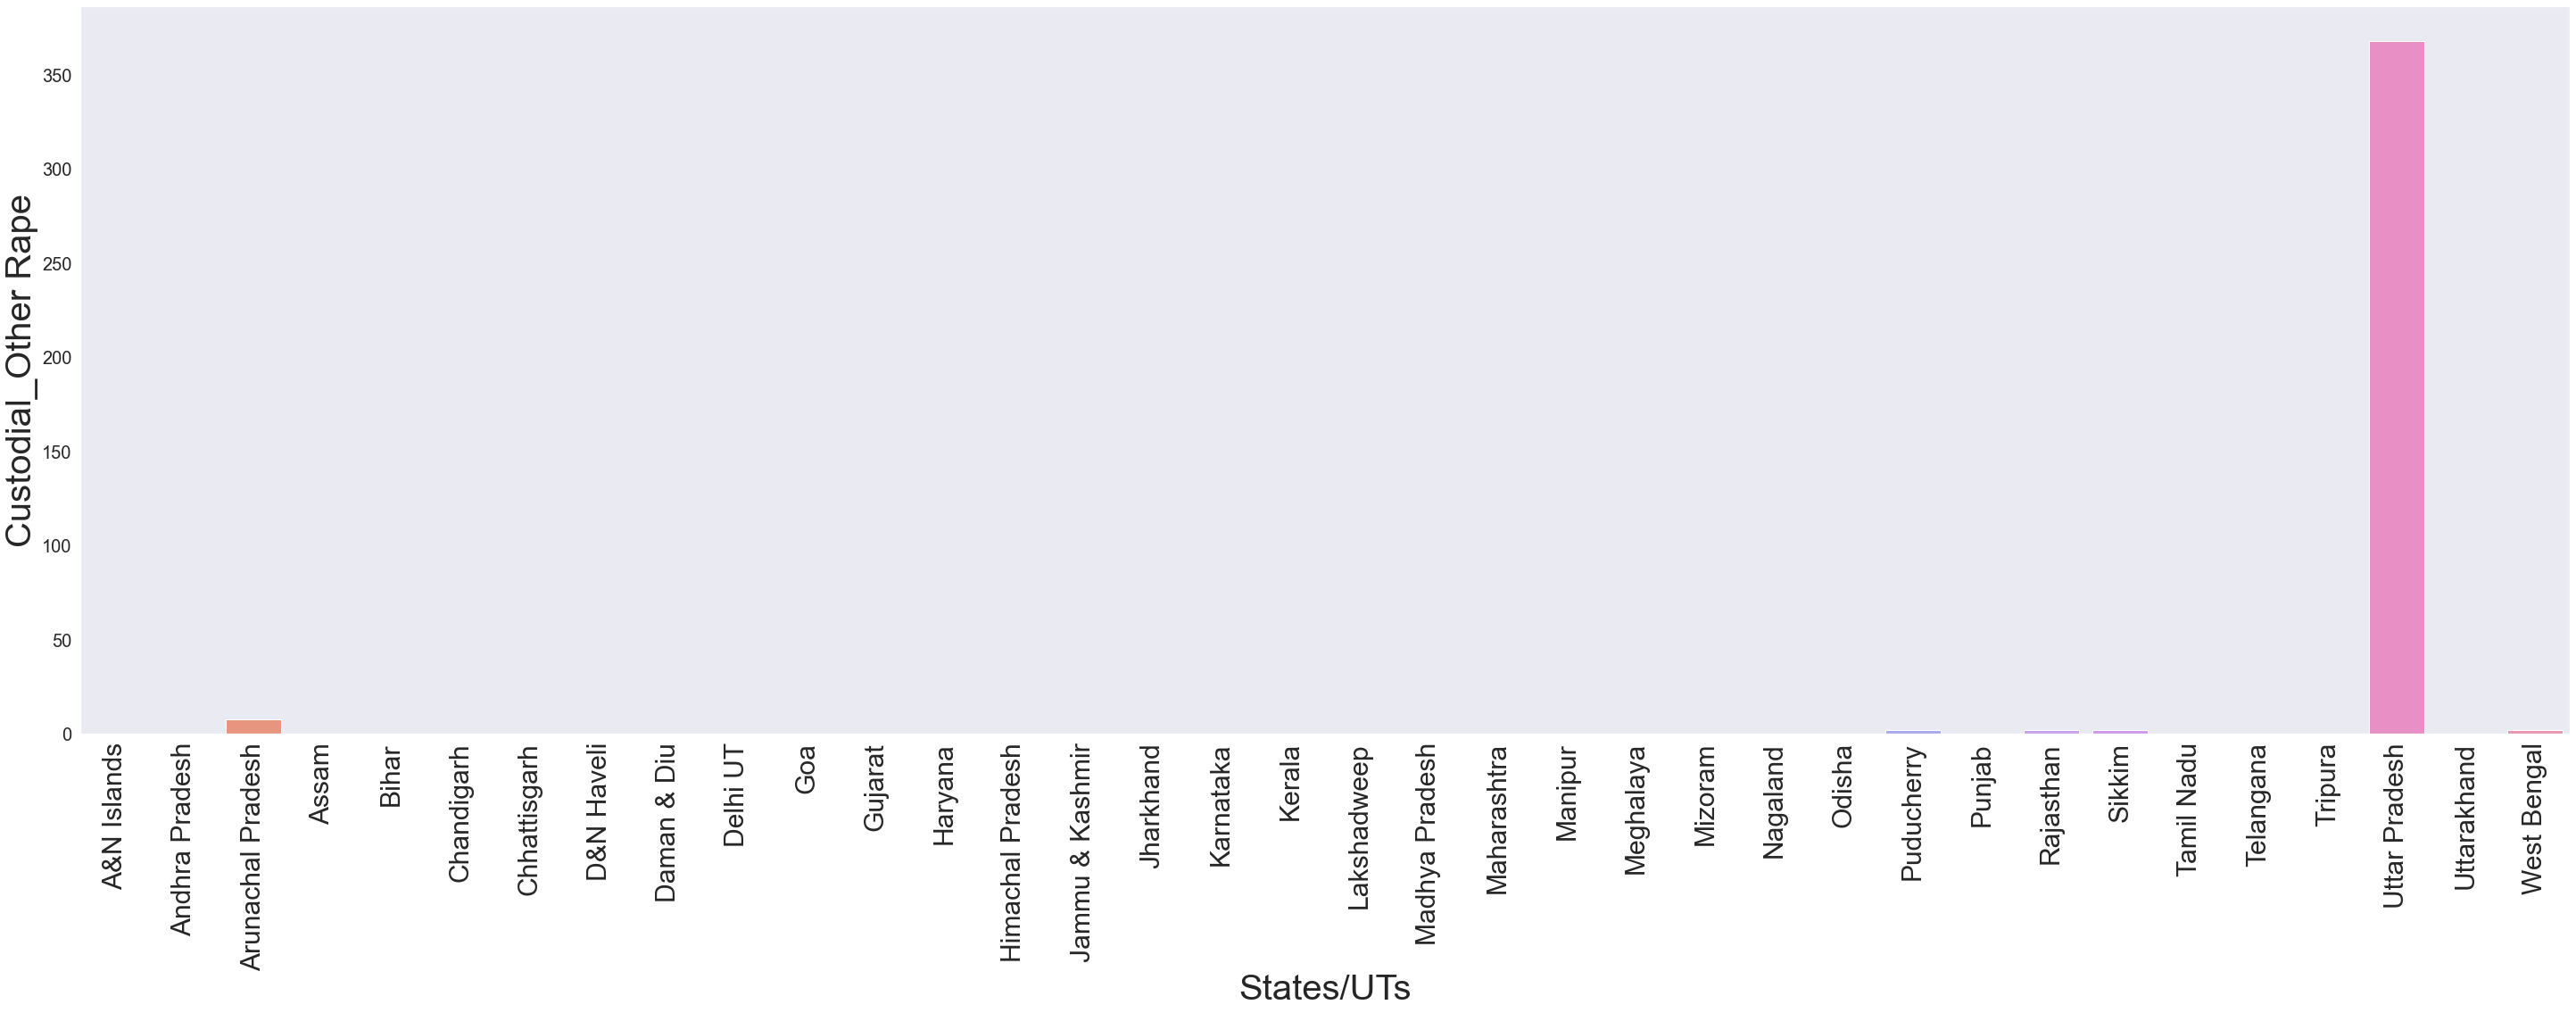

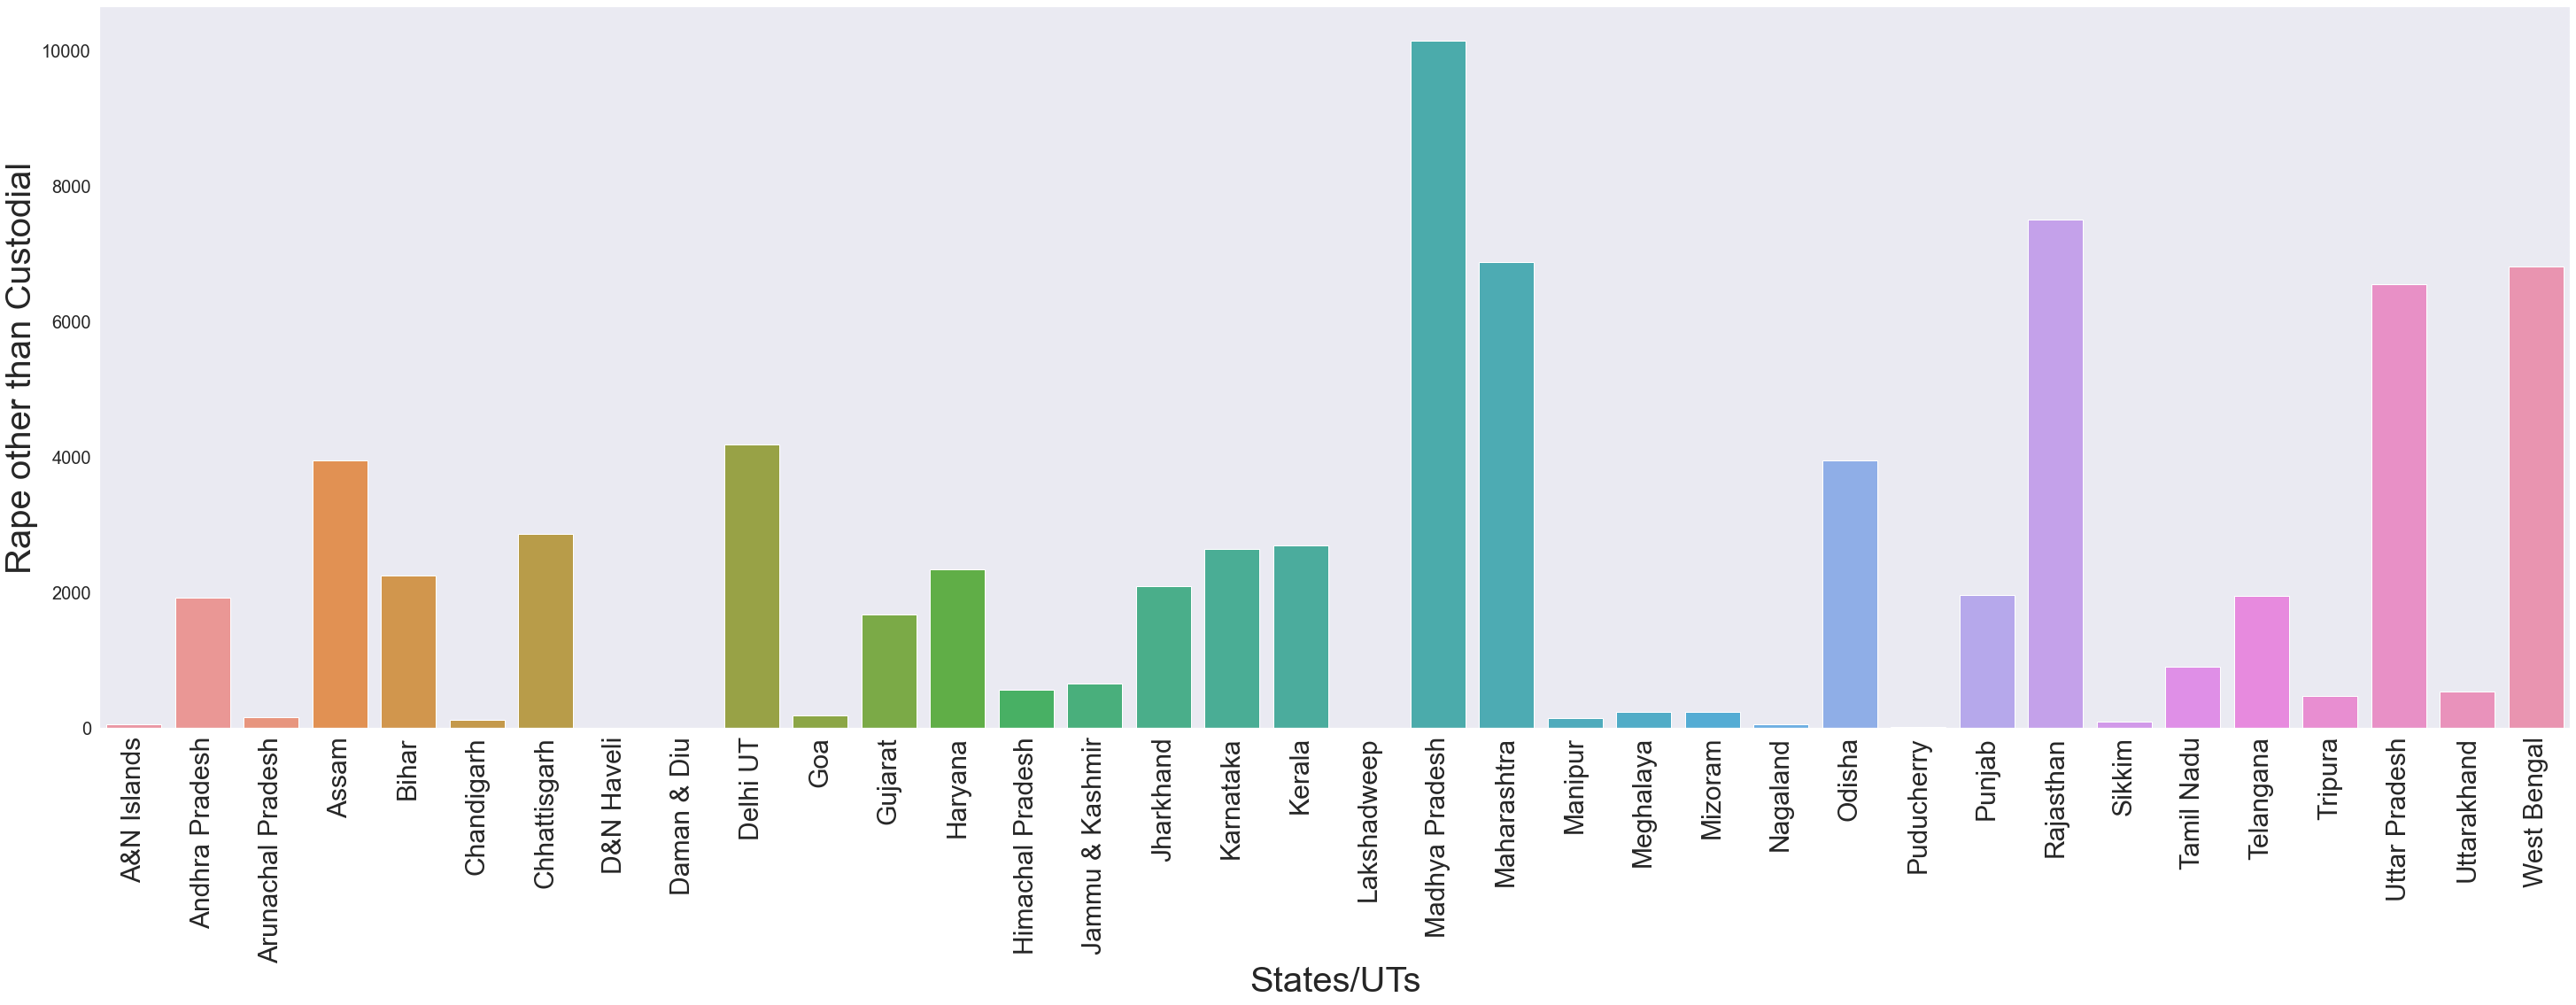

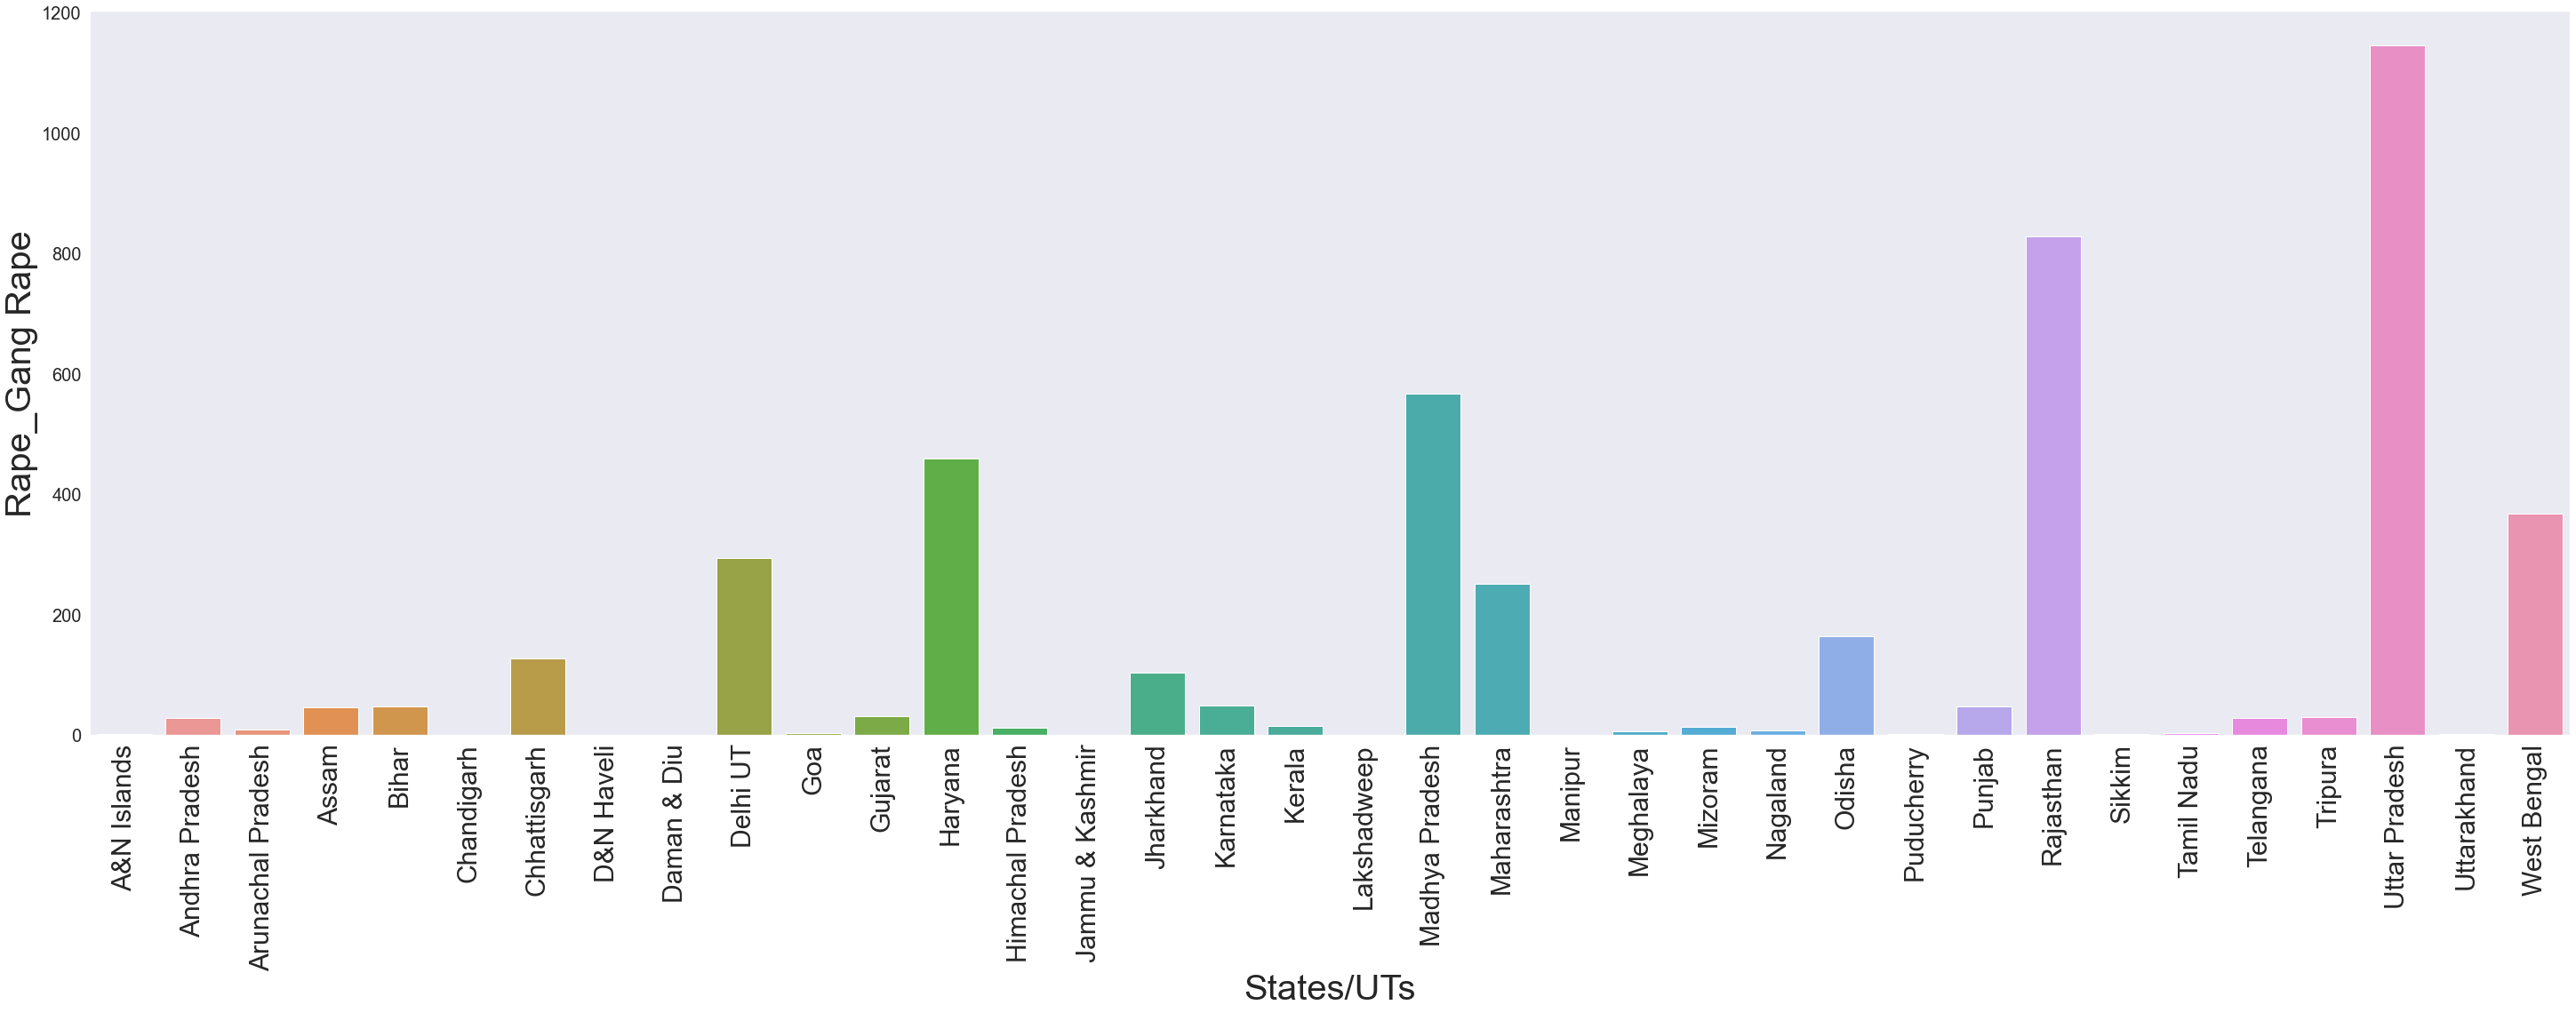

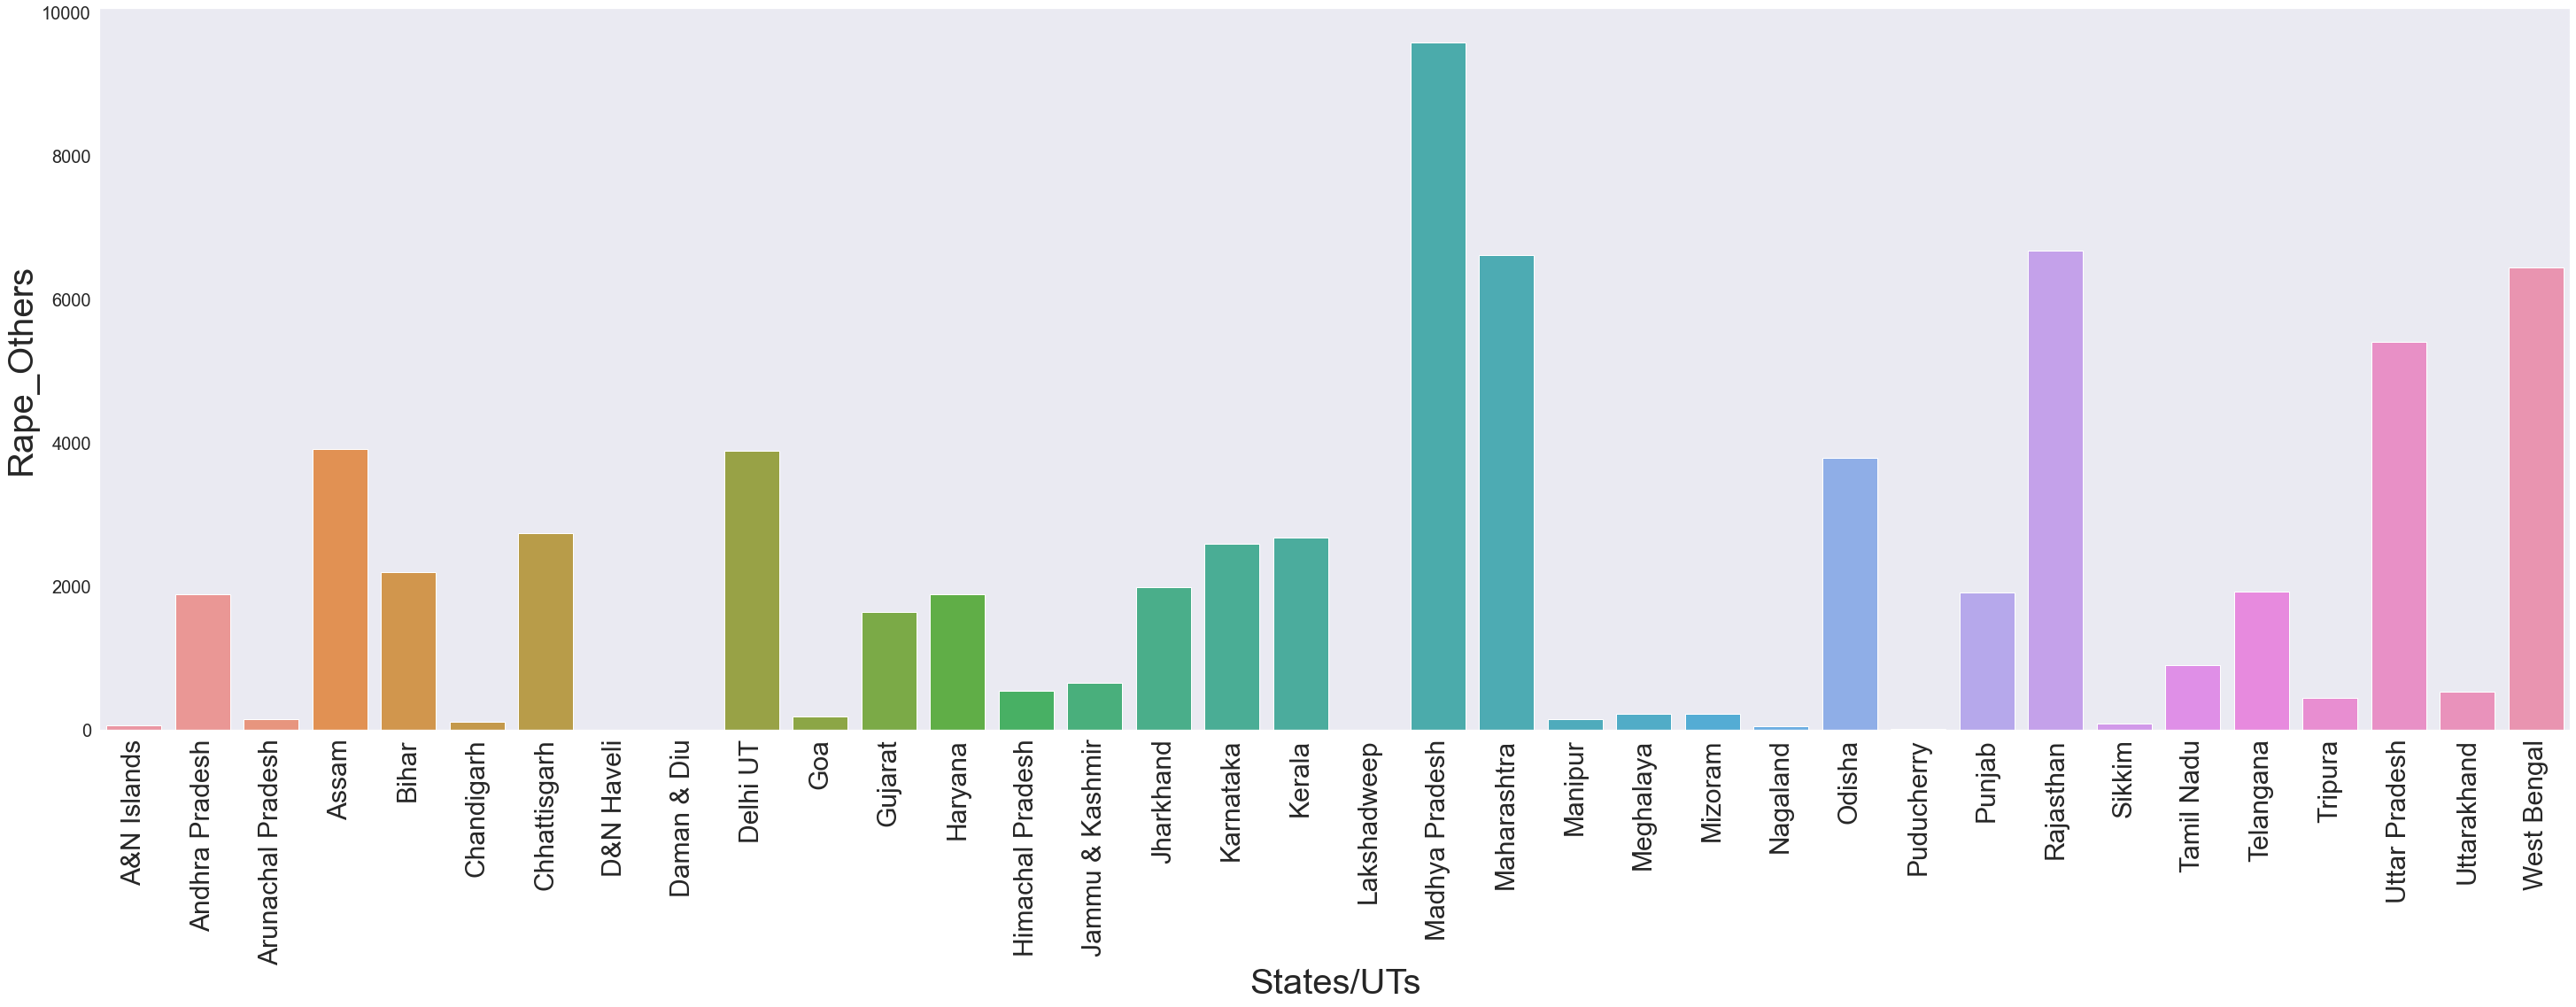

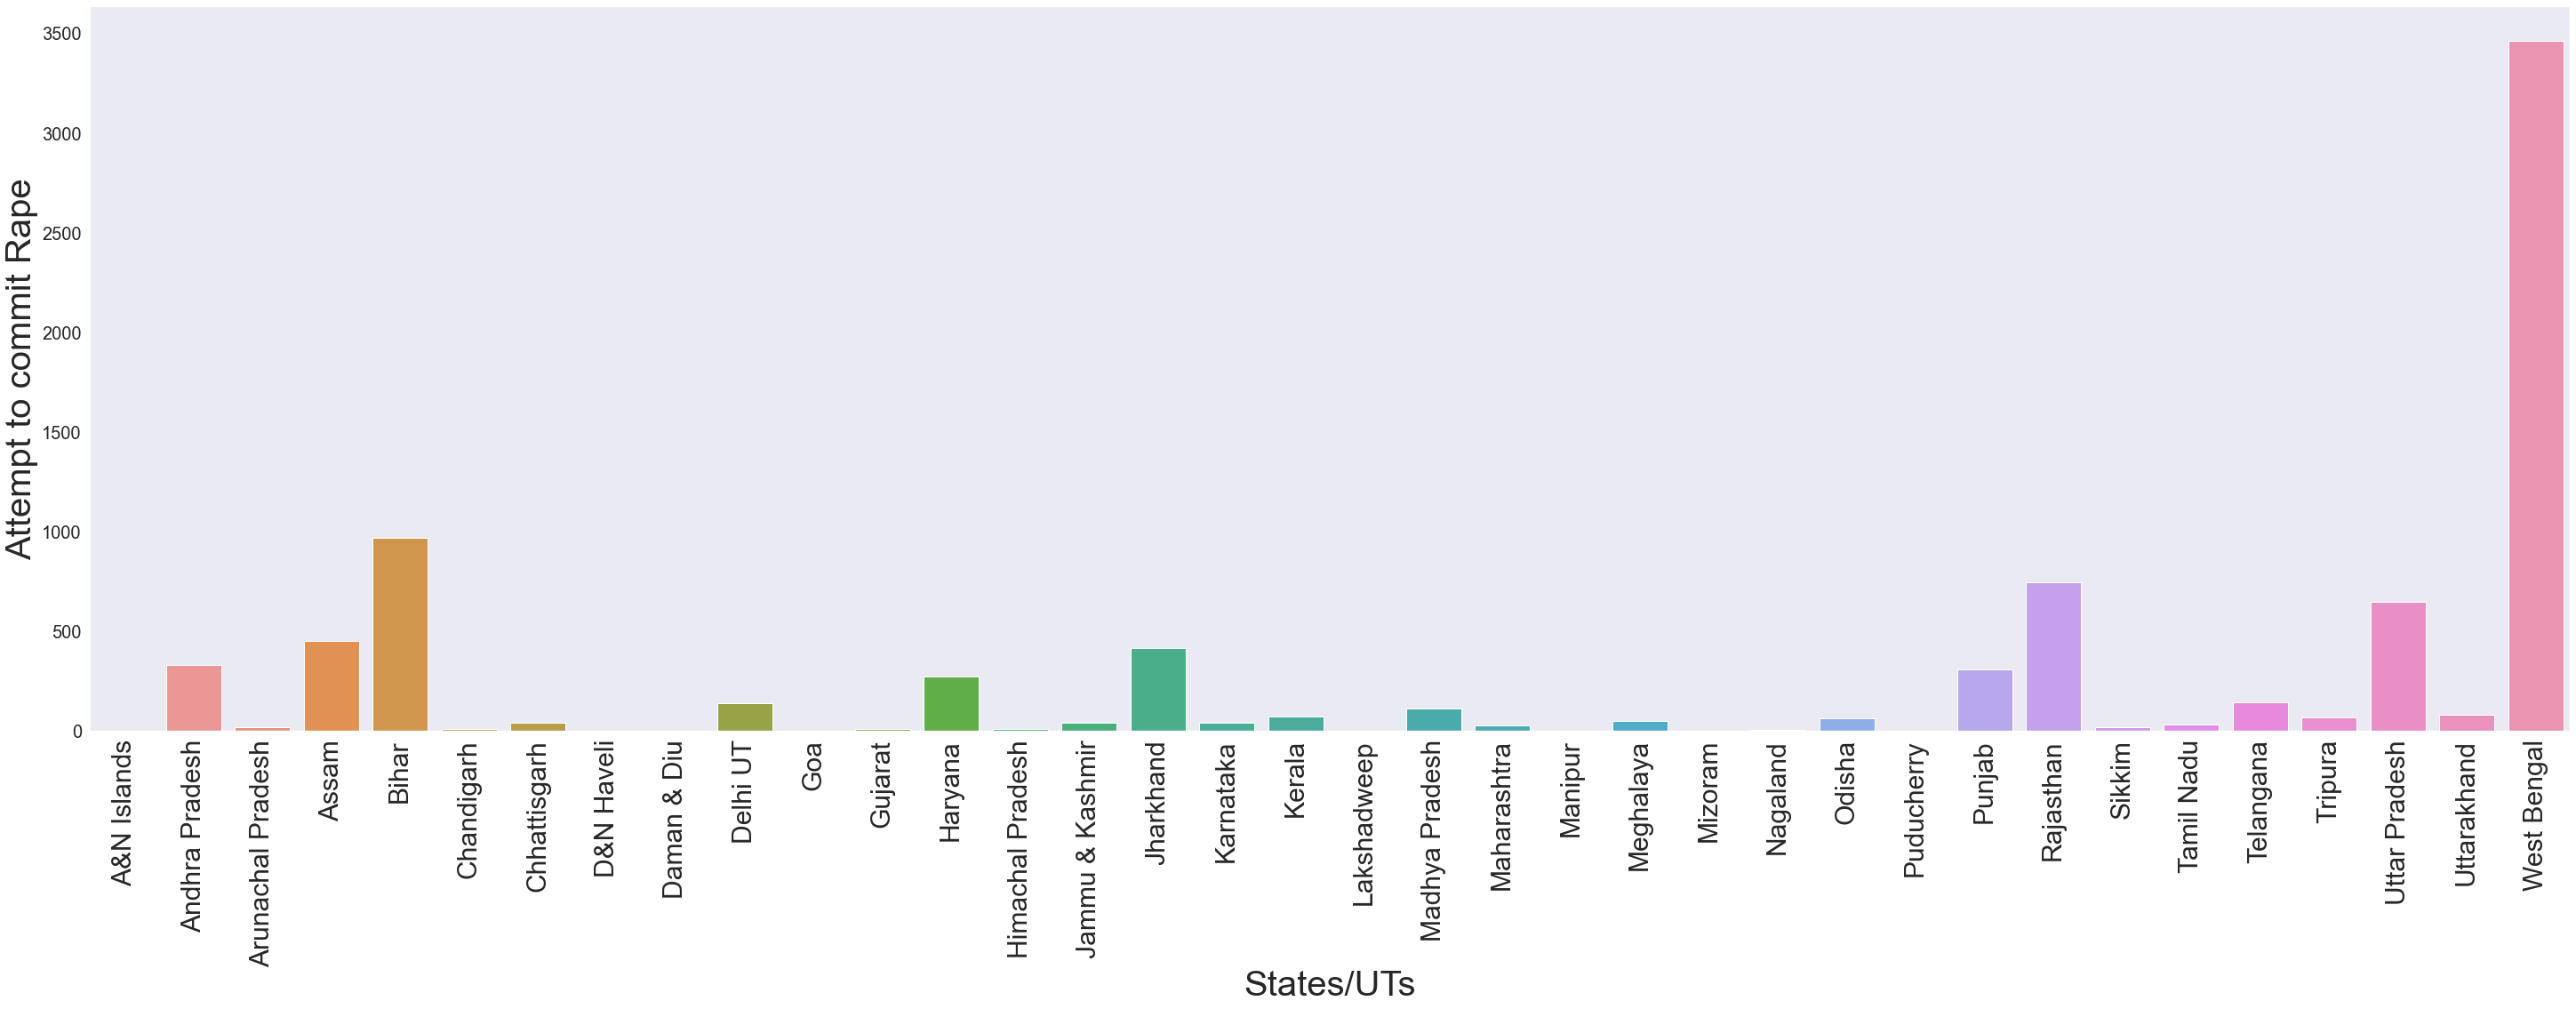

In [12]:
sns.set(style="dark")
for i in Rape_Crime:
    plt.figure(figsize=(50,15))
    plt.xlabel("States/UTs", fontsize=40)
    plt.ylabel(i, fontsize=40)
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=0,fontsize=20)
    sns.barplot(x="States/UTs",y=i,data=data_statewise)

In [13]:
data_statewise["Total_Rape"]=data_statewise.iloc[:,1:].sum(axis=1)

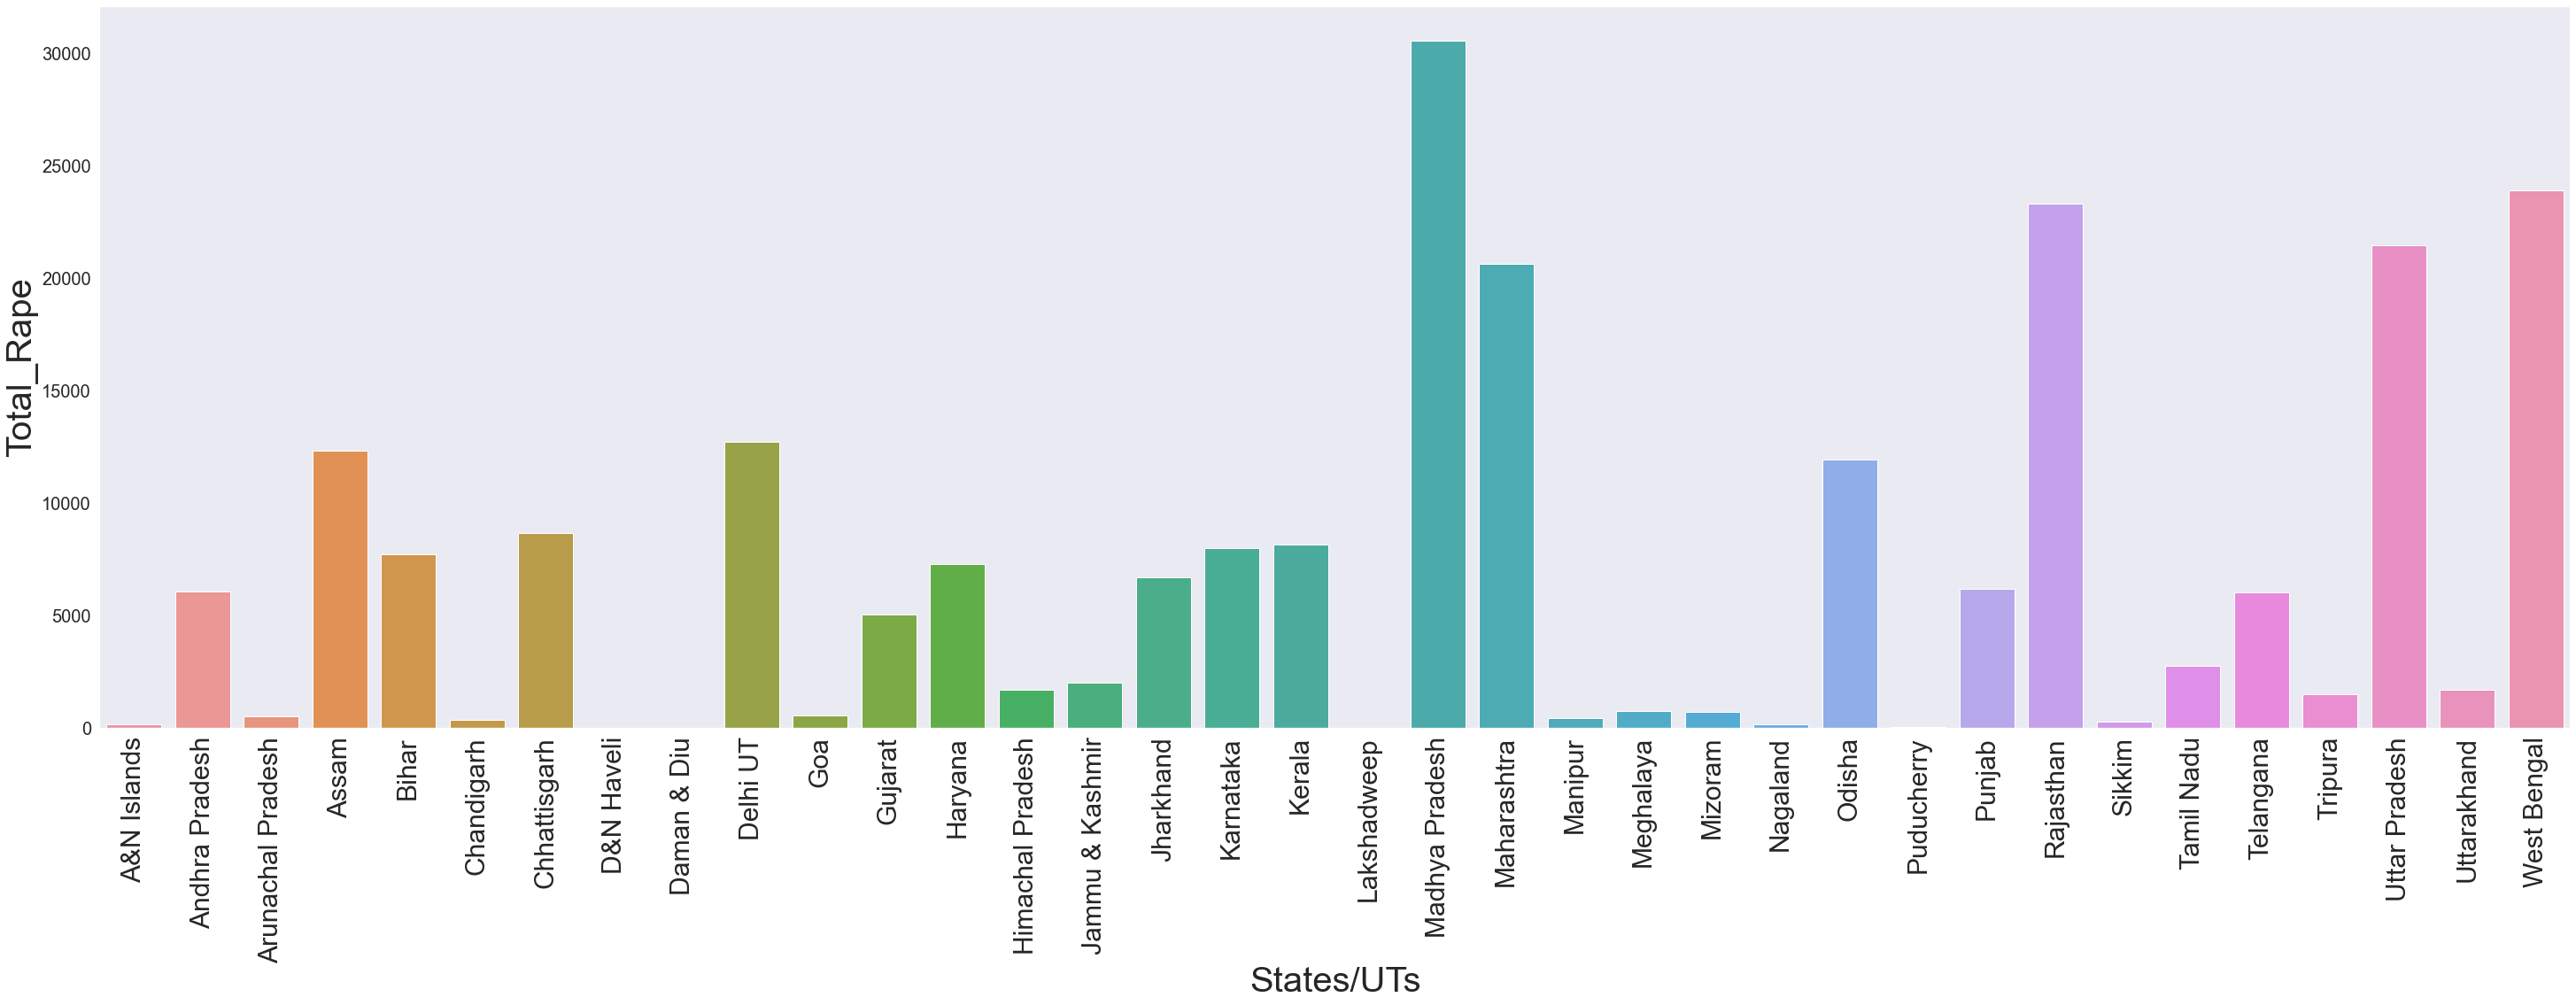

In [14]:
plt.figure(figsize=(50,15))
plt.xlabel("States/UTs", fontsize=40)
plt.ylabel("Total_Rape", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=20)
sns.barplot(x="States/UTs",y="Total_Rape",data=data_statewise)

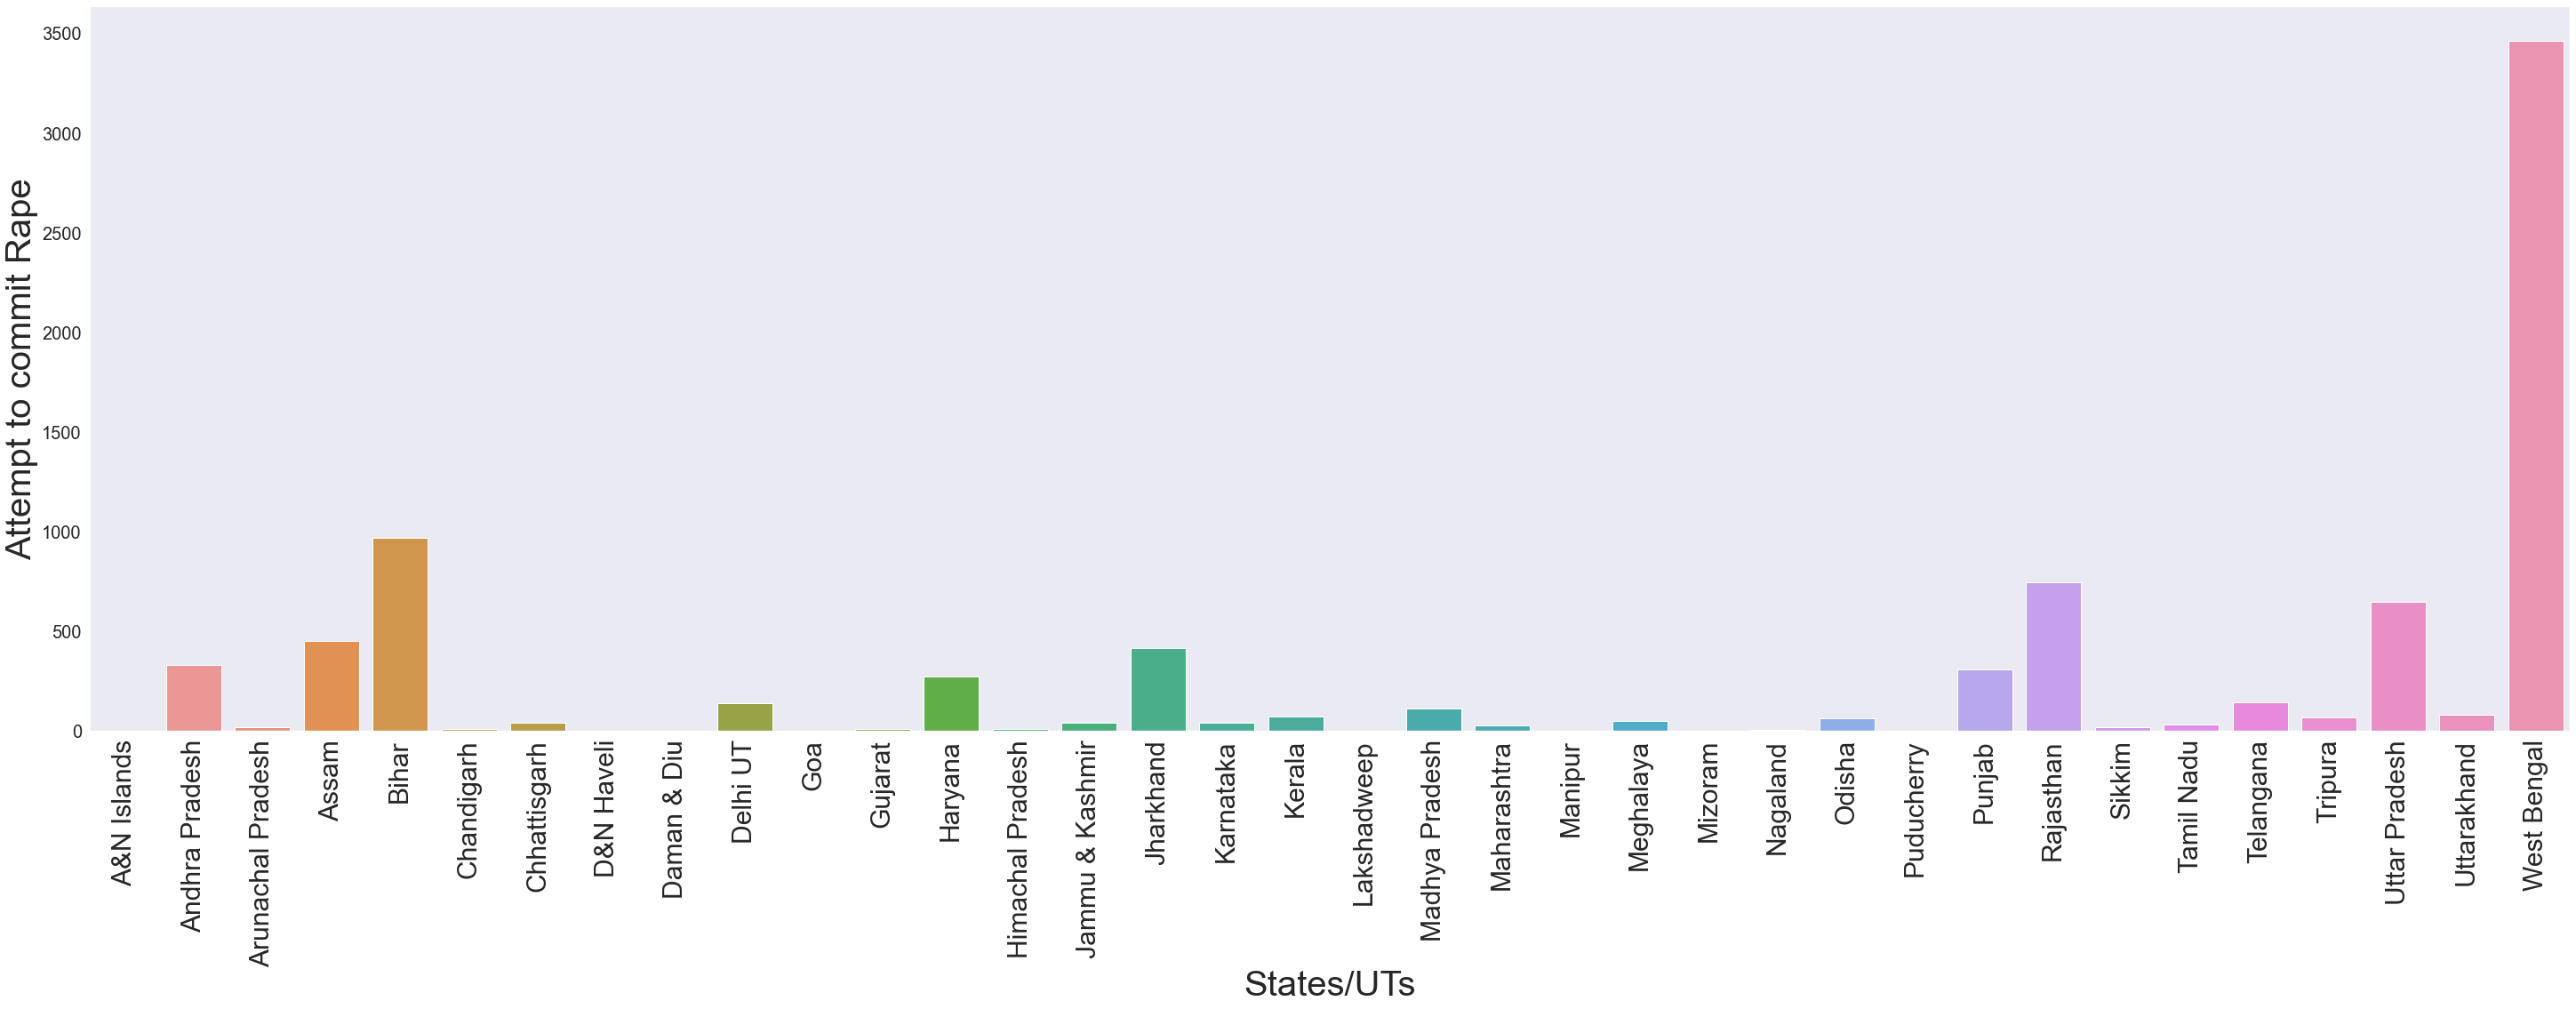

In [16]:
plt.figure(figsize=(50,15))
plt.xlabel("States/UTs", fontsize=40)
plt.ylabel("Total_Rape", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=20)
sns.barplot(x="States/UTs",y="Attempt to commit Rape",data=data_statewise)

In [17]:
data_statewise["Total_Rape_excluding_attempt"]=data_statewise.iloc[:,1:-2].sum(axis=1)

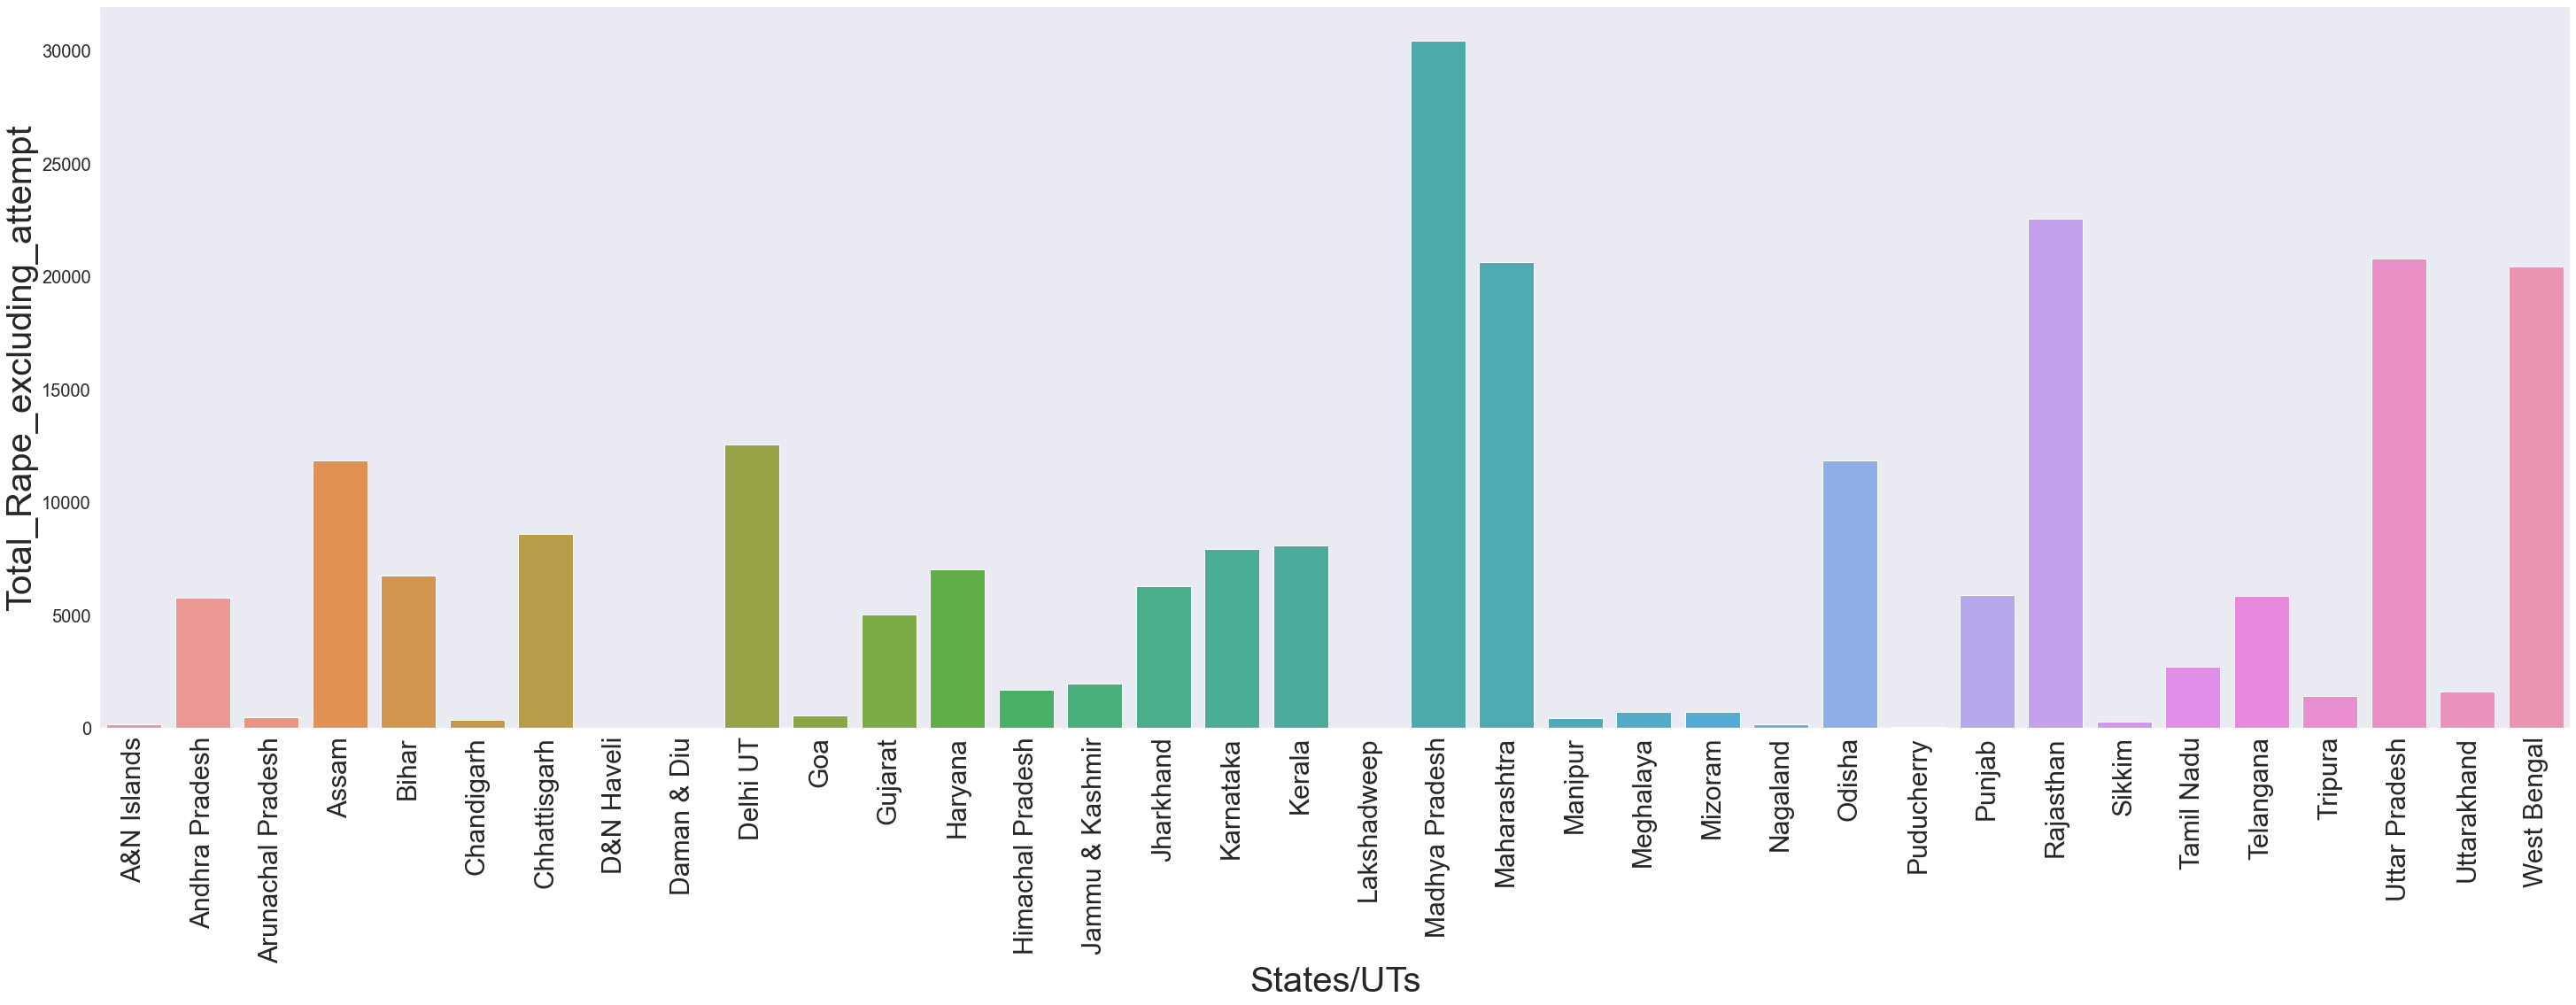

In [18]:
plt.figure(figsize=(50,15))
plt.xlabel("States/UTs", fontsize=40)
plt.ylabel("Total_Rape_excluding_attempt", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=20)
sns.barplot(x="States/UTs",y="Total_Rape_excluding_attempt",data=data_statewise)

# Madhya Pradesh has the highest number of victims